In [3]:
import sys
import os

# Add the src directory to the Python path
current_dir = os.path.dirname(os.path.abspath('__file__'))
parent_dir = os.path.dirname(current_dir)
src_dir = os.path.join(parent_dir, 'src')
sys.path.append(src_dir)

# Print current working directory and sys.path for debugging
print("Current working directory:", os.getcwd())
print("Python sys.path:")
for path in sys.path:
    print(path)

import numpy as np
import matplotlib.pyplot as plt
from preprocessing import train_test_split, load_mnist
from perceptron import Perceptron

# Adjust this path to match your folder structure
data_path = os.path.join(parent_dir, 'data', 'mnist')

# Load training data
X_train, y_train = load_mnist(data_path, kind='train')

# Load test data
X_test, y_test = load_mnist(data_path, kind='t10k')

# Normalize the data
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Current working directory: /Users/nathan/Desktop/Perceptron/notebooks
Python sys.path:
/Users/nathan/anaconda3/lib/python310.zip
/Users/nathan/anaconda3/lib/python3.10
/Users/nathan/anaconda3/lib/python3.10/lib-dynload

/Users/nathan/Desktop/Perceptron/perceptronenv/lib/python3.10/site-packages
/Users/nathan/Desktop/Perceptron/src
/Users/nathan/Desktop/Perceptron/src
Labels path: /Users/nathan/Desktop/Perceptron/data/mnist/train-labels-idx1-ubyte/train-labels-idx1-ubyte
Images path: /Users/nathan/Desktop/Perceptron/data/mnist/train-images-idx3-ubyte/train-images-idx3-ubyte
Labels path: /Users/nathan/Desktop/Perceptron/data/mnist/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
Images path: /Users/nathan/Desktop/Perceptron/data/mnist/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
Training data shape: (60000, 784)
Training labels shape: (60000,)
Test data shape: (10000, 784)
Test labels shape: (10000,)


Epoch 0, Loss: 2.301809448530933
Epoch 10, Loss: 2.1984249982389676
Epoch 20, Loss: 2.1033209185281554
Epoch 30, Loss: 2.0152860631144733
Epoch 40, Loss: 1.9336284682733922
Epoch 50, Loss: 1.857859647040915
Epoch 60, Loss: 1.7875669060852244
Epoch 70, Loss: 1.7223664787390018
Epoch 80, Loss: 1.6618896643430958
Epoch 90, Loss: 1.6057810968249346
Test accuracy: 0.7857


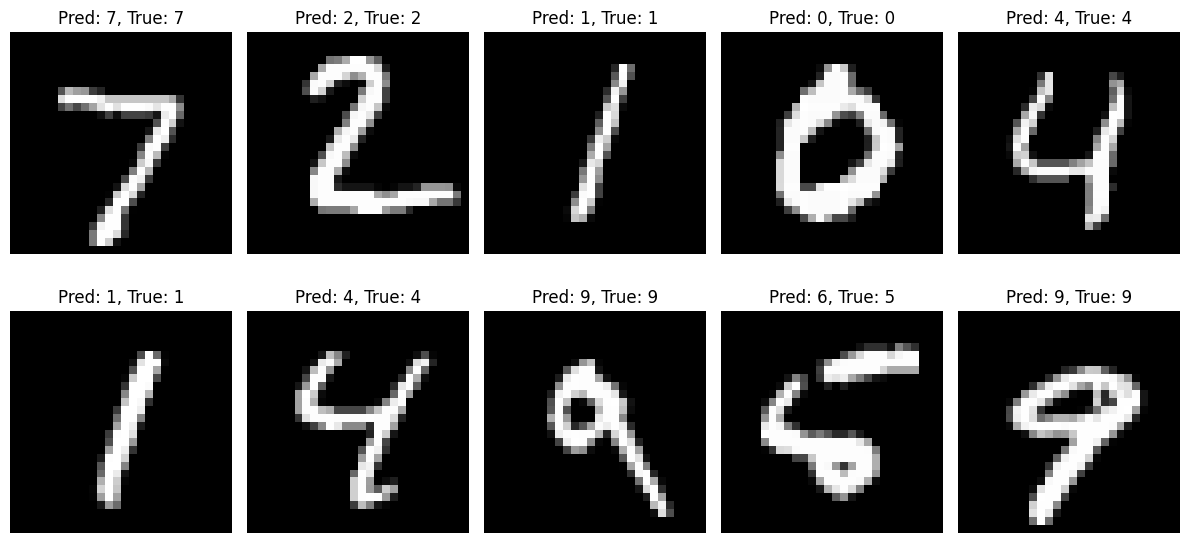

In [4]:
# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, seed=42)

# Initialize and train the perceptron
input_size = 784  # 28x28 pixels
num_classes = 10  # digits 0-9
perceptron = Perceptron(input_size, num_classes)
perceptron.train(X_train, y_train)

# Evaluate on test set
predictions = perceptron.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Test accuracy: {accuracy}")

# Visualize some predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {predictions[i]}, True: {y_test[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

Epoch 0, Loss: 2.318018856877121
Epoch 10, Loss: 2.211901445317061
Epoch 20, Loss: 2.1150052531175763
Epoch 30, Loss: 2.0257094051613254
Epoch 40, Loss: 1.943100759260061
Epoch 50, Loss: 1.8665731485554882
Epoch 60, Loss: 1.7956509005264953
Epoch 70, Loss: 1.7299156969427372
Epoch 80, Loss: 1.6689788398768255
Epoch 90, Loss: 1.6124723084558656
Test accuracy: 0.7691


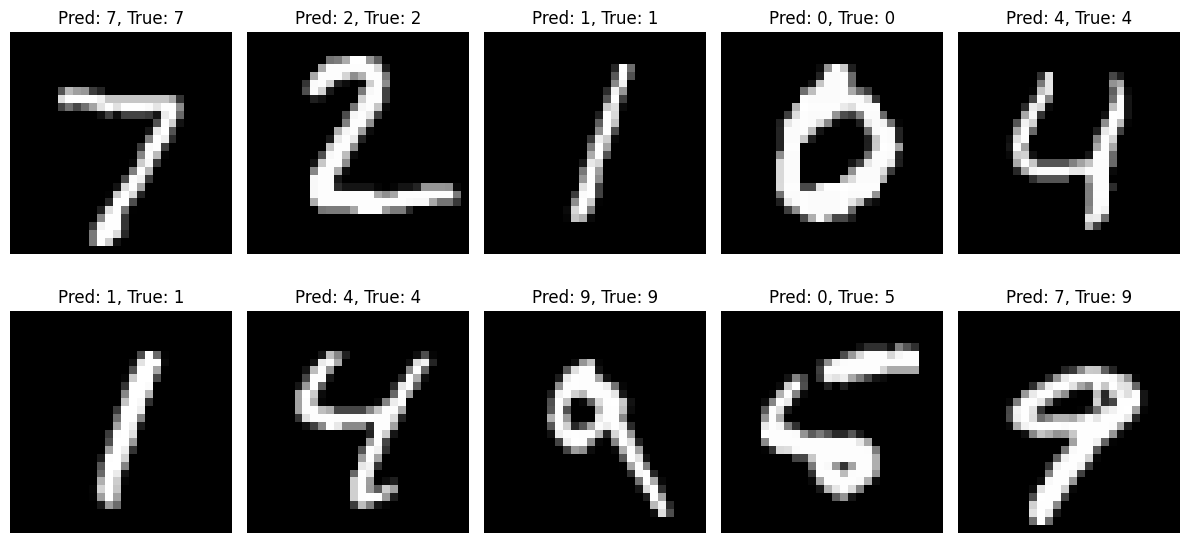

In [5]:
# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, seed=2108)

# Initialize and train the perceptron
input_size = 784  # 28x28 pixels
num_classes = 10  # digits 0-9
perceptron = Perceptron(input_size, num_classes)
perceptron.train(X_train, y_train)

# Evaluate on test set
predictions = perceptron.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Test accuracy: {accuracy}")

# Visualize some predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {predictions[i]}, True: {y_test[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()